In [1]:
import os

import numpy as np
import networkx as nx
import pandas as pd
import community
import matplotlib.pyplot as plt
datapath = "..\data"

In [2]:
G_book = nx.read_gpickle(os.path.join(datapath, "book.nxgraph"))
G_reddit = nx.read_gpickle(os.path.join(datapath, "asoiaf_data_cleaned.nxgraph"))

# Perform community detection on the book graph

Modularity: 0.1687996641483092


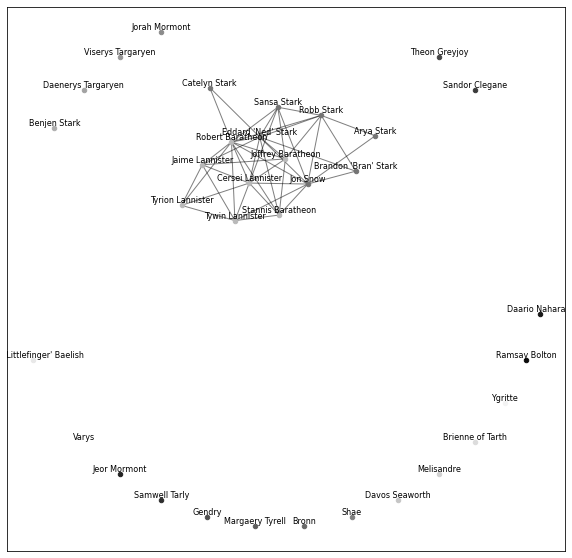

In [46]:
# Remove weaker edges from the graph
G_book_clean = G_book.copy()
book_weight_cutoff = 0.22
G_book_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_book_clean,'weight').items() if w < book_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_book_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_book_clean)
count = 0.
parts = []
for com, i in enumerate(set(partition.values())):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    parts.append(list_nodes)
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20,
                               node_color = str(count / size), ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book_clean, parts)}")
nx.draw_networkx_edges(G_book_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_book_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

# Community detection on the reddit graph

Modularity: 0.017772315072167765


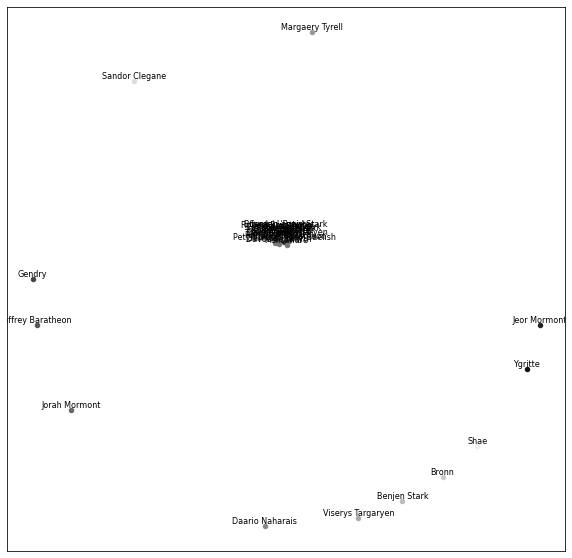

In [47]:
# Remove weaker edges from the graph
G_reddit_clean = G_reddit.copy()
reddit_weight_cutoff = 0.015
G_reddit_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_reddit_clean,'weight').items() if w < reddit_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_reddit_clean)

#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_reddit_clean)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_reddit_clean, pos, list_nodes, node_size = 20,
                               node_color = str(count / size), ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_reddit_clean, parts)}")
nx.draw_networkx_edges(G_reddit_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_reddit_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()